In [2]:
from qiskit import *
from math import *
from qiskit import QuantumRegister,ClassicalRegister
from qiskit.tools.visualization import *
%matplotlib inline

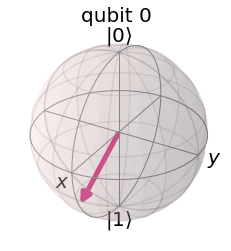

In [24]:
qc=QuantumRegister(1,'psi')
q1=QuantumRegister(1,'a')
q2=QuantumRegister(1,'b')
c=ClassicalRegister(2)
circuit=QuantumCircuit(qc,q1,q2,c)


circuit.initialize([(1/4)**0.5,(3/4)**0.5],qc)


circuit.x(qc)
circuit.h(q1)
circuit.cx(q1,q2)

circuit.barrier()

circuit.cx(qc,q1)
circuit.h(qc)

circuit.barrier()

circuit.measure(qc,c[0])
circuit.measure(q1,c[1])

circuit.barrier()

circuit.z(q2).c_if(c,1)
circuit.x(q2).c_if(c,2)
circuit.x(q2).c_if(c,3)
circuit.z(q2).c_if(c,3)

plot_bloch_multivector([(1/4)**0.5,(3/4)**0.5])

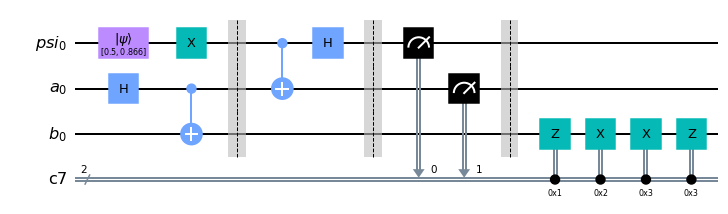

In [25]:
circuit.draw(output='mpl')

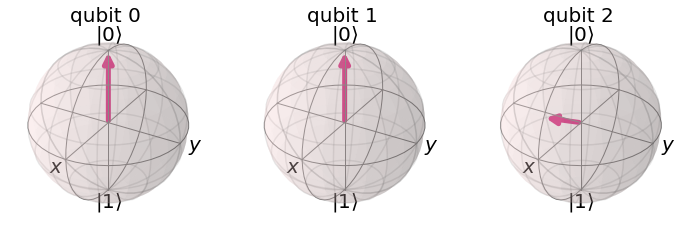

In [26]:
sim = Aer.get_backend('aer_simulator')
circuit.save_statevector()
out_vector = sim.run(circuit).result().get_statevector()
plot_bloch_multivector(out_vector)